# Prime numbers

The __$sieve of eratosthenes$__ algorithm is implemented below. This yields primes upto a given limit. We also examine the distribution of prime numbers amongst positive integers and note that the occurences of prime numbers decays (logarithmically) as they get larger.     

Using [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/), a statistical visualization library, to make the plots look prettier than the default matplotlib plots. Below cell will install seaborn, if missing.

In [ ]:
!pip install seaborn

Import the necessary python libraries

In [2]:
# Load Numpy as np, Matplotlib's pyplot as plt and embed the plots 
# inline in the notebook
%pylab inline                           
from math import ceil                      
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Set plotting styles and color palettes
sns.set(style = "ticks")
sns.set_palette("Set2")
sns.set_context("notebook", font_scale = 1.5, rc = {"lines.linewidth": 3.5,
                                                    "figure.figsize": (12, 8)})

###Primality    

The test of a number being prime is primality test. Trial division is the slow and painful method of identifying if the number is a prime. Primality test for n checks if multiple of any integer between 2 and $\sqrt{n}$ divides n.  

### Prime number theorem, Prime counting function
The prime number theorem (PNT) describes the asymptotic distribution of the prime numbers among the positive integers. It formalizes the intuitive idea that primes become less common as they become larger. With the prime counting function the idea is that for large enough N, the probability that a random integer not greater than N is prime is very close to $1 / ln(N)$. From the prime counting function we can approximately bound the $nth$ prime number by:       
$\ln n + \ln\ln n - 1 < \frac{p_n}{n} < \ln n + \ln \ln n \quad\text{for } n \ge 6$         

The counting function's integral strongly suggestive of the notion that the 'density' of primes around t should be $1 / ln(t)$.

### What is a sieve and how does it generate primes
Sieve theory is a set of general techniques in number theory, designed to count, or more realistically to estimate the size of, sifted sets of integers. The $sieve of eratosthenes$ generates primes by iteratively marking as composite (i.e., not prime) the multiples of each prime, starting with the multiples of 2.

_Sift the Two's and Sift the Three's,     
The Sieve of Eratosthenes.      
When the multiples sublime,         
The numbers that remain are Prime.      
~ Anonymous_

In [4]:
# Build a template to generate, store and process prime numbers
class PrimeNumbers:
  
    # default constructor: Initializes all the variables needed to generate primes
    # \input (N) :      the number of primes needed or the number "upto" which the primes are
    #                   to be generated.
    # \input (upto) :   if set to true then the algorithm will generate all primes upto "N"
    #
    # \note: the prime number theorem dictates the sieve size.
    def __init__(self, N, upto = False):
        self.N = N
        self.sieve_size = int(ceil(N * (np.log(N) + np.log(np.log(N)))))
        self.is_sieve_full = False
        self.primes = []                
        try:
            if upto == False:
                self.sieve = [True] * self.sieve_size
            else:
                self.sieve = [True] * N
                self.sieve_size = N
        except MemoryError:                
            # Capture memory errors, if the array allocations fail
            print "Error in the constructor, unable to allocate memory to store sieve"
            raise

    #  Implementation of the Sieve of eratosthenes.       
    def sieve_eratosthenes(self):
        # set the sieve size. 
        n = self.sieve_size
        
        # test for primality from 2 to sqrt(n)
        root = int(math.ceil(np.sqrt(n)))
        i = 2
        
        # if 'p' is a prime then enumerate all of its multiples (not including p) by 
        # counting to n in increments of p and mark them as non-primes.

        while i < root:
            if self.sieve[i] == True:
                i2 = i ** 2
                for j in range(i2, n, i):
                    self.sieve[j] = False       # No division used at all.           
            i += 1
        try:
            # the indices that are still marked as true in the sieve are primes. 
            # locate these indices and generate the primes. 
            self.primes = list(np.where(self.sieve)[0][2: ])
            self.is_sieve_full = True     # set the tracker flag to true
        except:
            self.is_sieve_full = False
            print "Error in sieve_eratosthenes, unable to allocate memory to store primes"
            raise     
        return           
       
    # Calculate the sum of the "N" primes    
    def sum(self):
        if self.is_sieve_full == True:
            return sum(self.primes[:self.N])
        else:
            # if the primes are not generated, then generate them and then calculate the sum
            self.sieve_eratosthenes()          
            return self.sum()
    
    def get_primes(self):
        if self.is_sieve_full == True:
            return self.primes
        else:
            # if the primes are not generated, then generate them first
            self.sieve_eratosthenes()
            return self.get_primes()

    def hist(self, axis):
        if self.is_sieve_full == True:
            # plot the histogram of the prime numbers
            return axis.hist(self.get_primes(), bins = 100, color = "seagreen",
                             edgecolor = "white", alpha = 0.55, label = "Histogram")
        else:
            # if the primes are not generated, then generate them and then plot the histogram
            self.sieve_eratosthenes()
            return self.hist(axis)
        

##Plot a histogram of prime numbers up to $10^8$      

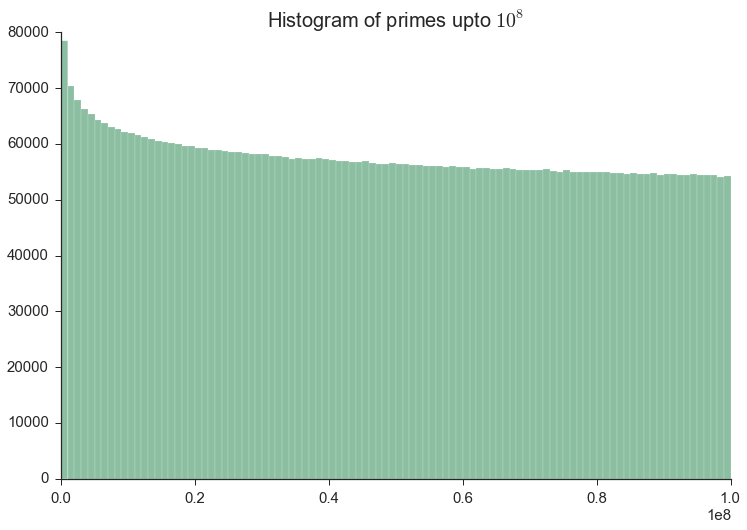

In [5]:
try:
    n = 100000000                             # 1e8
    p = PrimeNumbers(n, upto = True)          # generate prime numbers upto 1e8
    fig, ax = plt.subplots(1)                 # set figure and axis parameters
    p.hist(ax)                                # plot the histogram for the primes,
                                               
    plt.title('Histogram of primes upto $10^8$', fontsize = 20)
    sns.despine()
    plt.show()
except:
    print "Error generating primes. Unable to allocate memory!"   


###Calculate the sum of the first 1000 primes.

In [6]:
try:
    n = 1000
    p = PrimeNumbers(n)
    print "The sum of the first", n, "primes = ", p.sum()
except:
    print "Error generating primes. Unable to allocate memory!"   

The sum of the first 1000 primes =  3682913









###Scale code to sum up the first 100,000 primes?

In [7]:
try:
    n = 100000
    p = PrimeNumbers(n)
    %time print "The sum of the first", n, "primes = ", p.sum()
except:
    print "Error generating primes. Unable to allocate memory!"   

The sum of the first 100000 primes =  62260698721
CPU times: user 578 ms, sys: 10.5 ms, total: 589 ms
Wall time: 585 ms







###Conclusion

The class templates the sieve and the prime number generation. The most surprising fact, is that the density of primes is not dependent the prime itself, but on the limit N. Ideally, we should use memory pools and not re-allocate memory whenever a new sieve is to be allocated/calculated. 

__References:__     
[Prime Pages](https://primes.utm.edu)    
[Prime Density](https://primes.utm.edu/howmany.html#3)    
[Prime Number Theorem](http://en.wikipedia.org/wiki/Prime_number_theorem)       
[Prime Counting Function](http://en.wikipedia.org/wiki/Prime-counting_function)      


In [8]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">